#### COMPANION WORKBOOK

# Data Wrangling

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Prep Work

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '% 3f' %x)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
tx_df = pd.read_csv('int_online_tx.csv')

In [3]:
tx_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.750000,12583.000000,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.750000,12583.000000,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.750000,12583.000000,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.850000,12583.000000,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.650000,12583.000000,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.850000,12583.000000,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.250000,12583.000000,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.950000,12583.000000,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.950000,12583.000000,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.950000,12583.000000,France


## II. Transaction-Level Data Cleaning

In [4]:
# Missing data by feature

tx_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [5]:
# drop observations with missing customer ID's

clean_tx_df = tx_df[tx_df.CustomerID.notnull()].copy()

In [6]:
# convert the CustomerID's from floats into integers.

clean_tx_df['CustomerID'] = clean_tx_df['CustomerID'].astype(int)

In [7]:
# Display first 5 CustomerID's in the transaction dataset

clean_tx_df.CustomerID.head(5)

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

In [8]:
# Create 'Sales' interaction feature (Feature Engineering)

clean_tx_df['Sales'] = clean_tx_df.Quantity * clean_tx_df.UnitPrice

In [9]:
# Display first 5 Sales values in the transaction dataset

clean_tx_df.Sales.head(5)

0    90.000000
1    90.000000
2    45.000000
3    10.200000
4    15.600000
Name: Sales, dtype: float64

## III. Customer-Level Feature Engineering

In [10]:
# Aggegrate invoice data
# get Number of unique purchases by the customer

invoice_data = clean_tx_df.groupby('CustomerID').InvoiceNo.agg(['nunique'])

# invoice_data.columns is referring to the aggregate by result that is nunique
invoice_data.columns

# nunique is being renamed total_transactions

invoice_data.columns = ['total_transactions']

# get first five data of invoice_data

invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


## IV. Intermediary Levels & Multi-Index Group-By

In [11]:
# Aggregate cart-level data (i.e. invoice-level)

cart_data = clean_tx_df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg(['sum'])

cart_data.columns = ['cart_value']

In [12]:
# reset index using the reset index method
cart_data.reset_index(inplace=True)

In [13]:
# display first five data of cart_data

cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.790000
1,12347,542237,475.390000
2,12347,549222,636.250000
3,12347,556201,382.520000
4,12347,562032,584.910000


#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 1.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, confirm that you have a clean transaction-level dataframe. Display the first 5 observations from <code>clean_tx_df</code>.
* Do you have a <code>Sales</code> column?

In [14]:
# check for Sales column

clean_tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.750000,12583,France,90.000000
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.750000,12583,France,90.000000
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.750000,12583,France,45.000000
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.850000,12583,France,10.200000
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.650000,12583,France,15.600000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
      <th>Sales</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>536370</td>
      <td>22728</td>
      <td>ALARM CLOCK BAKELIKE PINK</td>
      <td>24</td>
      <td>12/1/10 8:45</td>
      <td>3.75</td>
      <td>12583</td>
      <td>France</td>
      <td>90.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>536370</td>
      <td>22727</td>
      <td>ALARM CLOCK BAKELIKE RED</td>
      <td>24</td>
      <td>12/1/10 8:45</td>
      <td>3.75</td>
      <td>12583</td>
      <td>France</td>
      <td>90.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>536370</td>
      <td>22726</td>
      <td>ALARM CLOCK BAKELIKE GREEN</td>
      <td>12</td>
      <td>12/1/10 8:45</td>
      <td>3.75</td>
      <td>12583</td>
      <td>France</td>
      <td>45.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>536370</td>
      <td>21724</td>
      <td>PANDA AND BUNNIES STICKER SHEET</td>
      <td>12</td>
      <td>12/1/10 8:45</td>
      <td>0.85</td>
      <td>12583</td>
      <td>France</td>
      <td>10.2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>536370</td>
      <td>21883</td>
      <td>STARS GIFT TAPE</td>
      <td>24</td>
      <td>12/1/10 8:45</td>
      <td>0.65</td>
      <td>12583</td>
      <td>France</td>
      <td>15.6</td>
    </tr>
  </tbody>
</table>

#### B.) Display the number of missing values in <code>clean_tx_df</code>. Are there still any?

In [15]:
# check for missing values in the clean_tx_df dataset

clean_tx_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

#### C.) After confirming part (A) and (B), save your cleaned transaction-level data as <code style="color:crimson">cleaned_transactions.csv</code>.
* We'll return to this in <span style="color:royalblue">Modules 2 and 3</span> to create the features for individual items.
* Remember to set <code style="color:steelblue">index=None</code> to save only the data and not the auto-generated index.

In [16]:
clean_tx_df.to_csv('cleaned_transactions', index=None)

#### D.) Confirm that you've successfully created <code>invoice_data</code>. What is the average number of total transactions by customers in the dataset?

In [17]:
#print(invoice_data['total_transactions'].agg('mean'))
print(invoice_data['total_transactions'].mean())

3.710144927536232


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
3.710144927536232
</pre>

#### E.) Finally, confirm that you've successfully created <code>cart_data</code>. What is the average cart value in the dataset?

In [18]:
print(cart_data['cart_value'].mean())

609.8249414062511


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
609.8249414062511
</pre>

## <span style="color:RoyalBlue">Exercise 1.2 - Transaction-Level Exploration</span>

Even though we want customer-level data for our ABT, it's still helpful to do some basic exploratory analysis at the transaction level.

There are 3 things we've found very helpful to check.
1. Shape of the dataset... to know how many observations you have.
2. First 10 observations... to get a qualitative "feel" for the data.
3. Distribution of transactions by country... to see the current "clusters."

These will give us guideposts for data wrangling.

#### A.) First, display the shape of the dataset.

In [19]:
clean_tx_df.shape

(33698, 9)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(35116, 8)
</pre>

Remember, these observations are transactions, not customers!

#### B.) Next, display the first 10 observations from the dataset.

In [20]:
clean_tx_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.750000,12583,France,90.000000
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.750000,12583,France,90.000000
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.750000,12583,France,45.000000
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.850000,12583,France,10.200000
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.650000,12583,France,15.600000
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.850000,12583,France,40.800000
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.250000,12583,France,30.000000
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.950000,12583,France,53.100000
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.950000,12583,France,70.800000
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.950000,12583,France,46.800000


#### C.) Here are some questions to consider.
* In the first 10 observations, how many different customers are there?
* How many different invoices are there?
* Given answers to the first two questions, how many unique purchases are shown?
* Technically, aren't these observations actually **line-items** within each transaction?
* Do you expect the customer-level dataset to be much smaller?

#### D.) Finally, display the distribution of transactions by country.

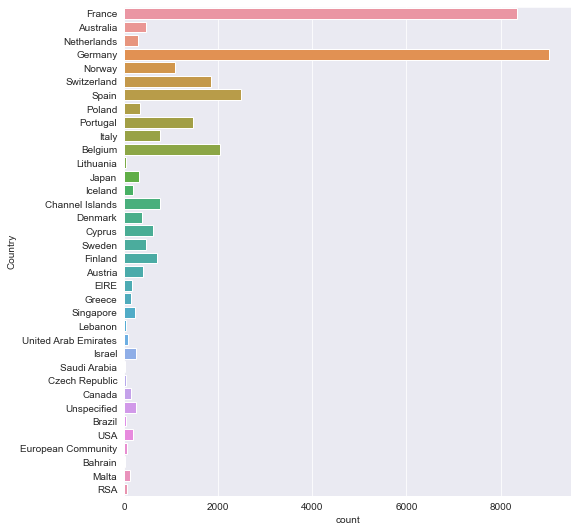

In [21]:
plt.figure(figsize=(8,9))

sns.countplot(y='Country', data=clean_tx_df)

plt.show()

As you can see, there are many **sparse classes**. Countries like Lithuania, Brazil, and even the USA have a tiny number of transactions.
* Plus, remember, this is at the transaction/line-item level. 
* The number of customers for each country is even smaller because each customer has multiple transactions!
* Therefore, it's plain to see that clustering by country is not very efficient.

## <span style="color:RoyalBlue">Exercise 1.3 - Customer-Level Aggregations</span>

In the Coding Section, you learned how to aggregate invoice data by customer. We then engineered one new feature called <code>'total_transactions'</code>.

#### A.) Next, using the same technique, aggregate product data by customer. Engineer 2 features:
* <code style="color:steelblue">'total_products'</code> - the total number of products purchased by each customer (not the unit Quantity within each product!).
* <code style="color:steelblue">'total_unique_products'</code> - the number of unique products purchased by each customer.
* **Hint:** you'll want to use the Item ID column (i.e. StockCode) after your groupby!
* Let's name it <code style="color:crimson">product_data</code>.

In [22]:

clean_tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.750000,12583,France,90.000000
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.750000,12583,France,90.000000
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.750000,12583,France,45.000000
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.850000,12583,France,10.200000
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.650000,12583,France,15.600000


In [23]:
product_data = clean_tx_df.groupby(['CustomerID']).StockCode.agg(['count', 'nunique'])
product_data.columns = ['total_products', 'total_unique_products']
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_products</th>
      <th>total_unique_products</th>
    </tr>
    <tr>
      <th>CustomerID</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12347.0</th>
      <td>182</td>
      <td>103</td>
    </tr>
    <tr>
      <th>12348.0</th>
      <td>31</td>
      <td>22</td>
    </tr>
    <tr>
      <th>12349.0</th>
      <td>73</td>
      <td>73</td>
    </tr>
    <tr>
      <th>12350.0</th>
      <td>17</td>
      <td>17</td>
    </tr>
    <tr>
      <th>12352.0</th>
      <td>85</td>
      <td>59</td>
    </tr>
  </tbody>
</table>

By definition, <code style="color:steelblue">'total_unique_products'</code> should always be less than or equal to <code style="color:steelblue">'total_products'</code>.

#### B. Confirm that all customers'  <code style="color:steelblue">'total_unique_products'</code> are less than or equal to their corresponding <code style="color:steelblue">'total_products'</code>.
* Tip: There are multiple ways correct to confirm this. We've included one way in the Answer Key.

In [37]:
# any(product_data['total_unique_products'] <= product_data['total_products'])
all(product_data['total_unique_products'] <= product_data['total_products'])

True

#### C.) Finally, aggregate sales data by customer. Engineer 2 features:
* <code style="color:steelblue">'total_sales'</code> - the total sales for each customer.
* <code style="color:steelblue">'avg_product_value'</code> - the average value of the products purchased by the customer (not the UnitPrice!).
* **Hint:** you'll want to use the Sales column after your groupby!
* Let's name it <code style="color:crimson">sales_data</code>.

In [24]:
sales_data = clean_tx_df.groupby(['CustomerID']).Sales.agg(['sum', 'mean'])
sales_data.columns = ['total_sales', 'avg_product_value']
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.000000,23.681319
12348,1797.240000,57.975484
12349,1757.550000,24.076027
12350,334.400000,19.670588
12352,2506.040000,29.482824


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_sales</th>
      <th>avg_product_value</th>
    </tr>
    <tr>
      <th>CustomerID</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12347</th>
      <td>4310.00</td>
      <td>23.681319</td>
    </tr>
    <tr>
      <th>12348</th>
      <td>1797.24</td>
      <td>57.975484</td>
    </tr>
    <tr>
      <th>12349</th>
      <td>1757.55</td>
      <td>24.076027</td>
    </tr>
    <tr>
      <th>12350</th>
      <td>334.40</td>
      <td>19.670588</td>
    </tr>
    <tr>
      <th>12352</th>
      <td>2506.04</td>
      <td>29.482824</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 1.4 - Customer-Level Cart Data</span>

In the Coding Section, we first aggregated cart data at the "cart-level." Now that we have **cart-level** cart data, all we need to do is roll up by CustomerID again to get **customer-level** cart data.

#### A.) Just as a refresher, display the first 5 observations from <code>cart_data</code>.

In [25]:
cart_data.head(5)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.790000
1,12347,542237,475.390000
2,12347,549222,636.250000
3,12347,556201,382.520000
4,12347,562032,584.910000


#### B.) Aggregate cart data by customer. Engineer 3 features:
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.
* Let's name it <code style="color:crimson">agg_cart_data</code>.

In [28]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(['mean', 'min','max'])
agg_cart_data.columns = ['avg_cart_value', 'min_cart_value', 'max_cart_value']
agg_cart_data.head(5)

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.820000,1294.320000
12348,449.310000,227.440000,892.800000
12349,1757.550000,1757.550000,1757.550000
12350,334.400000,334.400000,334.400000
12352,313.255000,120.330000,840.300000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_cart_value</th>
      <th>min_cart_value</th>
      <th>max_cart_value</th>
    </tr>
    <tr>
      <th>CustomerID</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12347</th>
      <td>615.714286</td>
      <td>224.82</td>
      <td>1294.32</td>
    </tr>
    <tr>
      <th>12348</th>
      <td>449.310000</td>
      <td>227.44</td>
      <td>892.80</td>
    </tr>
    <tr>
      <th>12349</th>
      <td>1757.550000</td>
      <td>1757.55</td>
      <td>1757.55</td>
    </tr>
    <tr>
      <th>12350</th>
      <td>334.400000</td>
      <td>334.40</td>
      <td>334.40</td>
    </tr>
    <tr>
      <th>12352</th>
      <td>313.255000</td>
      <td>120.33</td>
      <td>840.30</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 1.5 - Merging the ABT</span>

Great, now you have multiple dataframes that each contain customer-level features. You have:
* <code style="color:crimson">invoice_data</code>
* <code style="color:crimson">product_data</code>
* <code style="color:crimson">sales_data</code>
* <code style="color:crimson">agg_cart_data</code>

Next, all you need to do is **join / merge** them all together.

#### A.) Join the various customer-level datasets together with the <code style="color:steelblue">.join()</code> function.
* Just pick one of the customer-level dataframes and join it to a list of the others.
* By default, it will join the dataframes on their <code style="color:steelblue">index</code>... In this case, it will join by CustomerID, which is exactly what we want.
* You can read more about the <code style="color:steelblue">.join()</code> function in the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html" target="_blank">documentation</a>.

In [33]:
customer_df = invoice_data.join(product_data).join(sales_data).join(agg_cart_data)
customer_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.000000,23.681319,615.714286,224.820000,1294.320000
12348,4,31,22,1797.240000,57.975484,449.310000,227.440000,892.800000
12349,1,73,73,1757.550000,24.076027,1757.550000,1757.550000,1757.550000
12350,1,17,17,334.400000,19.670588,334.400000,334.400000,334.400000
12352,8,85,59,2506.040000,29.482824,313.255000,120.330000,840.300000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_transactions</th>
      <th>total_products</th>
      <th>total_unique_products</th>
      <th>total_sales</th>
      <th>avg_product_value</th>
      <th>avg_cart_value</th>
      <th>min_cart_value</th>
      <th>max_cart_value</th>
    </tr>
    <tr>
      <th>CustomerID</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12347</th>
      <td>7</td>
      <td>182</td>
      <td>103</td>
      <td>4310.00</td>
      <td>23.681319</td>
      <td>615.714286</td>
      <td>224.82</td>
      <td>1294.32</td>
    </tr>
    <tr>
      <th>12348</th>
      <td>4</td>
      <td>31</td>
      <td>22</td>
      <td>1797.24</td>
      <td>57.975484</td>
      <td>449.310000</td>
      <td>227.44</td>
      <td>892.80</td>
    </tr>
    <tr>
      <th>12349</th>
      <td>1</td>
      <td>73</td>
      <td>73</td>
      <td>1757.55</td>
      <td>24.076027</td>
      <td>1757.550000</td>
      <td>1757.55</td>
      <td>1757.55</td>
    </tr>
    <tr>
      <th>12350</th>
      <td>1</td>
      <td>17</td>
      <td>17</td>
      <td>334.40</td>
      <td>19.670588</td>
      <td>334.400000</td>
      <td>334.40</td>
      <td>334.40</td>
    </tr>
    <tr>
      <th>12352</th>
      <td>8</td>
      <td>85</td>
      <td>59</td>
      <td>2506.04</td>
      <td>29.482824</td>
      <td>313.255000</td>
      <td>120.33</td>
      <td>840.30</td>
    </tr>
  </tbody>
</table>

#### B.) Finally, let's save <code style="color:crimson">customer_df</code> as our analytical base table to use later.
* **Important:** We will not set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index (this will be important when we get to Module 4).
* Save the file as <code style="color:crimson">'analytical_base_table.csv'</code>

In [34]:
customer_df.to_csv('analytical_base_table')

Congratulations for making it through the Data Wrangling module! As a reminder, here are a few things you did in this module:
* You explored and cleaned the transaction-level dataset.
* You then rolled it up to the customer level, aggregating new features along the way.
* You also saw how intermediary groupby's can help you create otherwise tricky features.
* And you joined all of your customer-level datasets together into one analytical base table.

In the next module, we'll see how trying to include features for individual items can raise new challenges (i.e. The Curse of Dimensionality). We'll also introduce you to the first of 2 recommended solutions: thresholding.